<a href="https://colab.research.google.com/github/ReillyOareVT/ML_in_WR/blob/main/lecture_2_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lecture 2, 01/23/2025

---

First, you must import the necessary libraries to do your analysis. For us, these almost always include numpy, matplotlib, and pandas. Later, it will include more ML-focused libraries.

I also connect my Google Drive to load input files. Files uploaded manually are usually cleared from the system when your session ends.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import skew

# download/import the allisonia_peak.csv file from mmy Google Drive
!gdown "https://drive.google.com/uc?id=1J78-Plyyy78grG3Xc9hLnniH34kKPMpH"


Downloading...
From: https://drive.google.com/uc?id=1J78-Plyyy78grG3Xc9hLnniH34kKPMpH
To: /content/allisonia_peak.csv
100% 989/989 [00:00<00:00, 3.12MB/s]


# Let's plot some real-word data
Here, we have the peak annual discharge in ft3/s

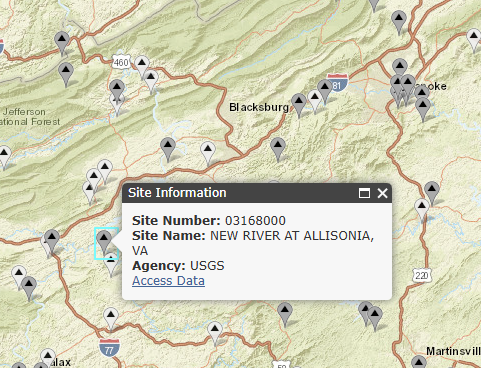

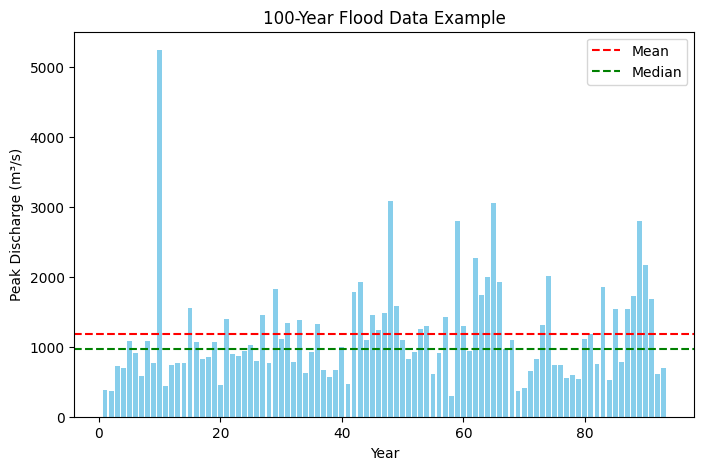

In [2]:
# Example flood data (annual peak discharge in cubic meters per second)
# USGS 03168000, New River at Allisonia, VA
df = pd.read_csv('allisonia_peak.csv')
flood_year = df.iloc[:, 0] # Selects all rows in the first column (index 0)
flood_data = df.iloc[:, 1]  # Selects all rows and the second column (index 1)

# Plotting the data
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(flood_data) + 1), flood_data, color='skyblue')
plt.axhline(np.mean(flood_data), color='red', linestyle='--', label='Mean')
plt.axhline(np.median(flood_data), color='green', linestyle='--', label='Median')
plt.title("100-Year Flood Data Example")
plt.xlabel("Year")
plt.ylabel("Peak Discharge (m³/s)")
plt.legend()
plt.show()

## Symmetry and Skewness
Skewed Distribution Visualization

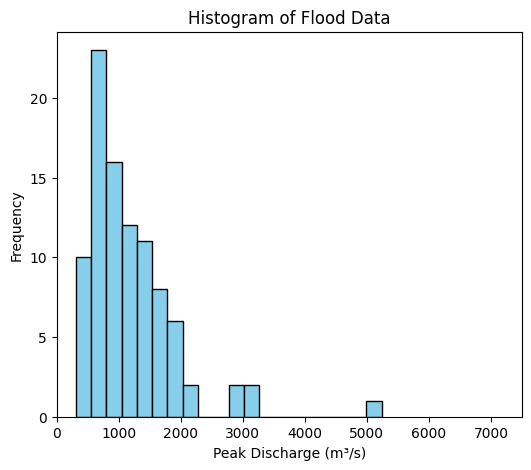

Skewness: 2.433306800782774


In [3]:
# Plot a histogram (count) of the various observations
plt.figure(figsize=(6, 5))
plt.hist(flood_data, bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Flood Data")
plt.xlabel("Peak Discharge (m³/s)")
plt.ylabel("Frequency")
plt.xlim(0, 7500)
plt.show()

# Calculate skewness
print("Skewness:", skew(flood_data))

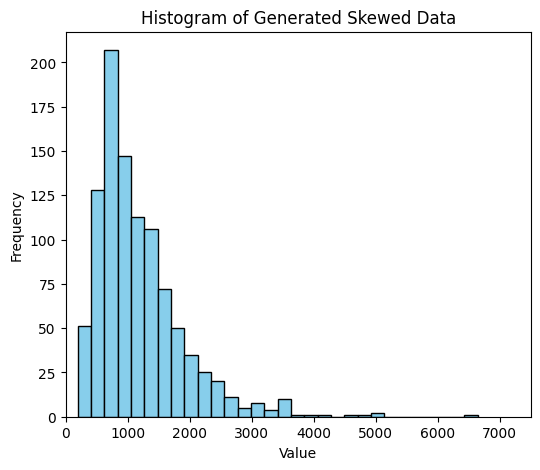

Skewness: 1.9849195246880647


In [4]:
# Generate a logarithmic distribution based on the observations
logvals = np.log(flood_data)
mean_log = np.mean(logvals);
stdev_log = np.std(logvals);

# Generate positively skewed data
skewed_data = np.random.lognormal(mean=mean_log, sigma=stdev_log, size=1000)

# Plot histogram
plt.figure(figsize=(6, 5))
plt.hist(skewed_data, bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Generated Skewed Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.xlim(0, 7500)
plt.show()

# Calculate skewness
print("Skewness:", skew(skewed_data))

## Measures of Central Tendency
Calculate Mean and Median with Outliers

In [5]:
# Dataset with and without outlier
dataset_with_outlier = [2, 4, 8, 9, 11, 11, 120]
dataset_without_outlier = [2, 4, 8, 9, 11, 11, 12]

# Calculate mean and median
print("With Outlier:")
print("Mean:", np.mean(dataset_with_outlier))
print("Median:", np.median(dataset_with_outlier))

print("\nWithout Outlier:")
print("Mean:", np.mean(dataset_without_outlier))
print("Median:", np.median(dataset_without_outlier))


With Outlier:
Mean: 23.571428571428573
Median: 9.0

Without Outlier:
Mean: 8.142857142857142
Median: 9.0


## Measures of Variability
Compare IQR and Standard Deviation

In [6]:
# Example dataset
data = pd.Series([2, 4, 8, 9, 11, 11, 120])

# Compute variability measures
iqr = data.quantile(0.75) - data.quantile(0.25)
std_dev = data.std()

print("Interquartile Range (IQR):", iqr)
print("Standard Deviation:", std_dev)


Interquartile Range (IQR): 5.0
Standard Deviation: 42.65699295096934


## Transformations
Log Transformation of Skewed Data

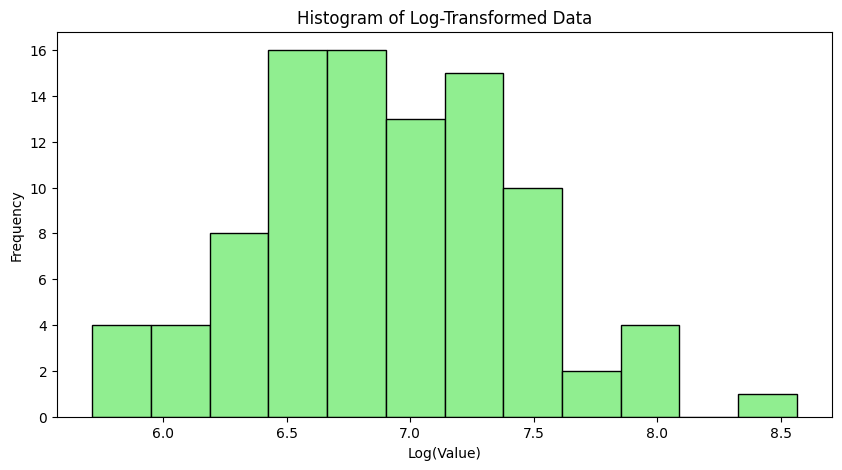

In [7]:
# Log-transform the data
log_transformed_data = np.log(flood_data)

# Plot histogram of transformed data
plt.figure(figsize=(10, 5))
plt.hist(log_transformed_data, bins=12, color='lightgreen', edgecolor='black')
plt.title("Histogram of Log-Transformed Data")
plt.xlabel("Log(Value)")
plt.ylabel("Frequency")
plt.show()
